In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 불러오기
df = pd.read_csv('/content/alldata.csv')

# 날짜 형식을 맞춰줍니다.
df['date'] = pd.to_datetime(df['date'])

# 필요한 열만 선택합니다.
columns = [
    '국내산화니켈.수출금액', '국내산화니켈.수출중량', '국내산화니켈.수입금액', '국내산화니켈.수입중량',
    '국내산화리튬.수출금액', '국내산화리튬.수출중량', '국내산화리튬.수입금액', '국내산화리튬.수입중량',
    '국내산화코발트.수출금액', '국내산화코발트.수출중량', '국내산화코발트.수입금액', '국내산화코발트.수입중량',
    '국내이산화망간.수출금액', '국내이산화망간.수출중량', '국내이산화망간.수입금액', '국내이산화망간.수입중량',
    '국내탄산리튬.수출금액', '국내탄산리튬.수출중량', '국내탄산리튬.수입금액', '국내탄산리튬.수입중량',
    '국내황산니켈.수출금액', '국내황산니켈.수출중량', '국내황산니켈.수입금액', '국내황산니켈.수입중량',
    '국내황산코발트.수출금액', '국내황산코발트.수출중량', '국내황산코발트.수입금액', '국내황산코발트.수입중량'
]

# 데이터 전처리
df_selected = df[columns].dropna()

# PCA 변환
pca = PCA(n_components=15)
pca_components = pca.fit_transform(df_selected.drop(columns=['국내산화니켈.수입금액', '국내산화리튬.수입금액', '국내산화코발트.수입금액', '국내이산화망간.수입금액', '국내탄산리튬.수입금액', '국내황산니켈.수입금액', '국내황산코발트.수입금액']))

# 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(15)])

# 종속 변수 추가
pca_df['국내산화니켈.수입금액'] = df_selected['국내산화니켈.수입금액'].values

# 데이터 분할
X = pca_df.drop(columns=['국내산화니켈.수입금액'])
y = pca_df['국내산화니켈.수입금액']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 833592.4052692141
R-squared: 0.8234723183715579


In [ ]:
# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib.font_manager 임포트
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

print("폰트 설정 완료")


Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
폰트 설정 완료


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


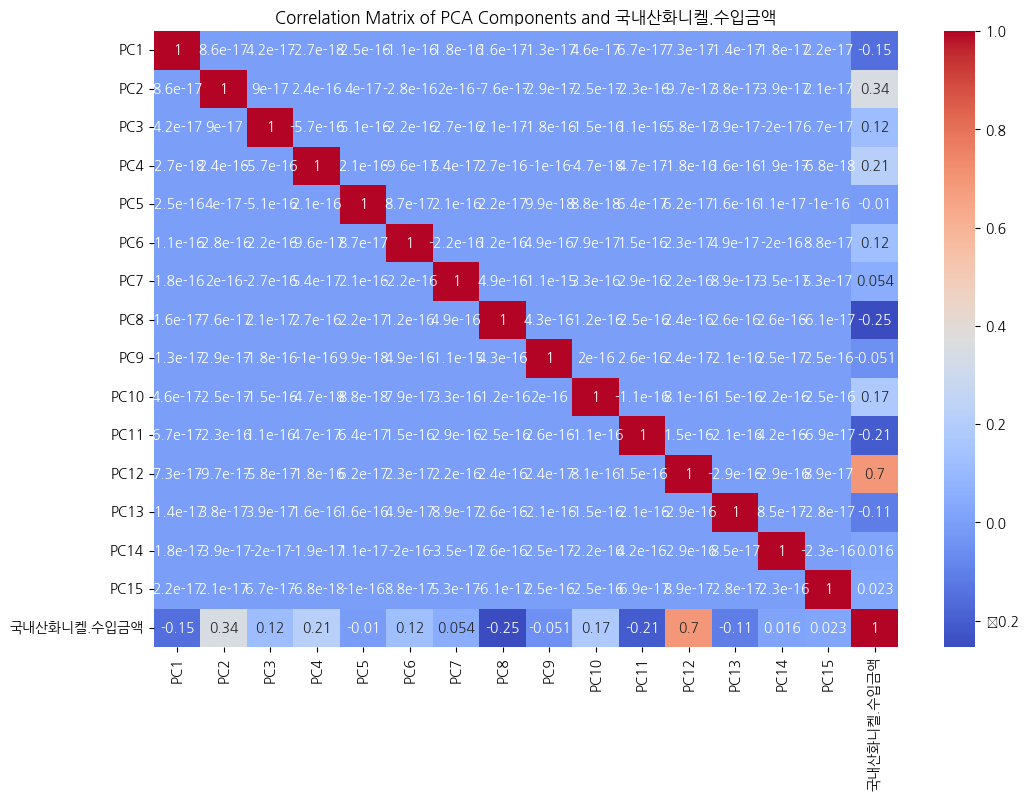

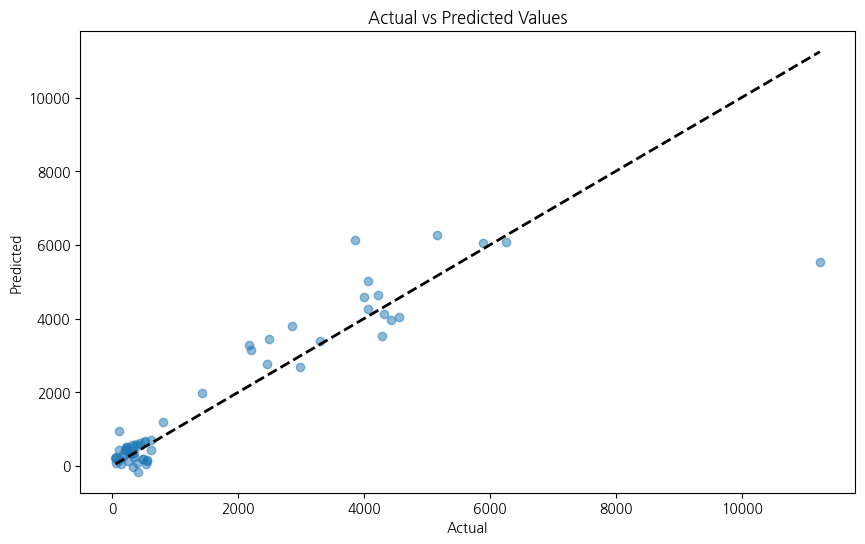

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 분석
correlation_matrix = pca_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of PCA Components and 국내산화니켈.수입금액')
plt.show()

# 모델 예측값과 실제값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


폰트 설정 완료


<ipython-input-3-22b33e076050>:73: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


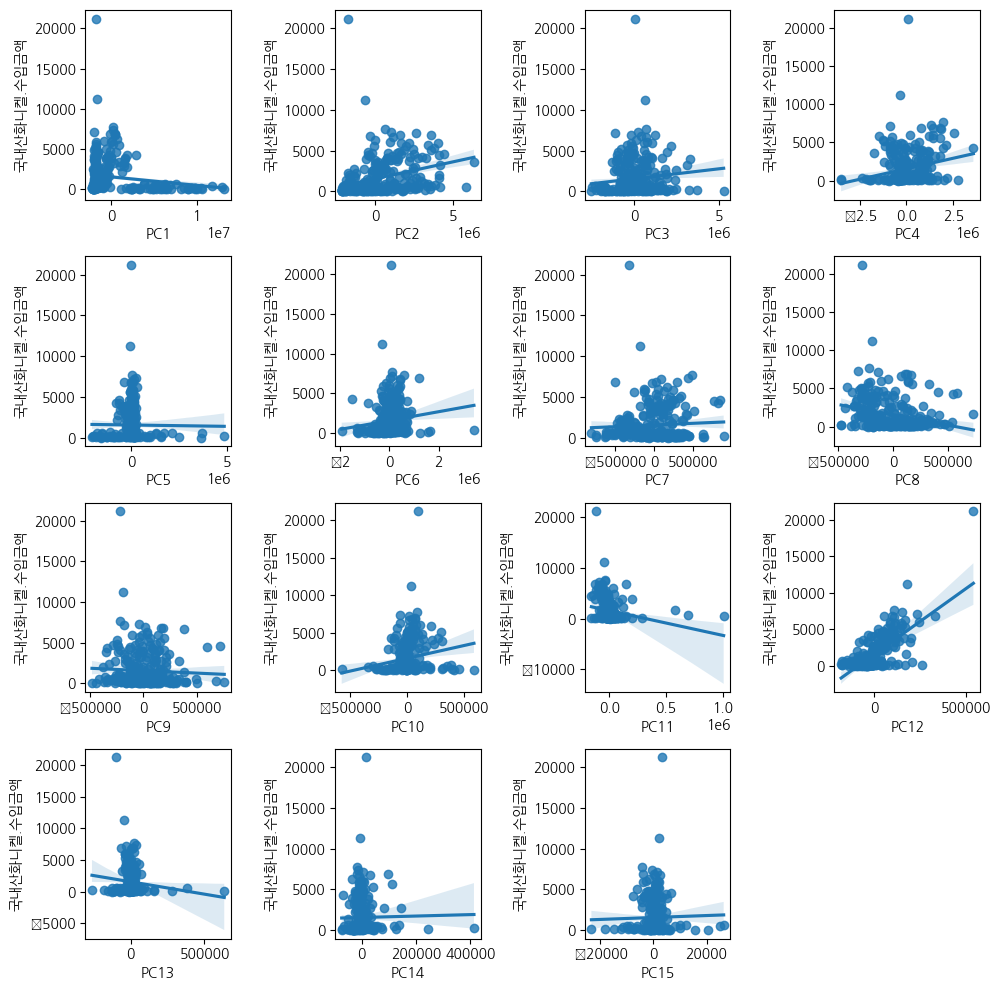

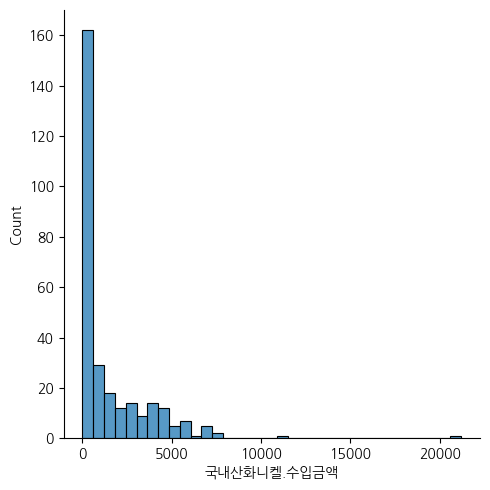

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


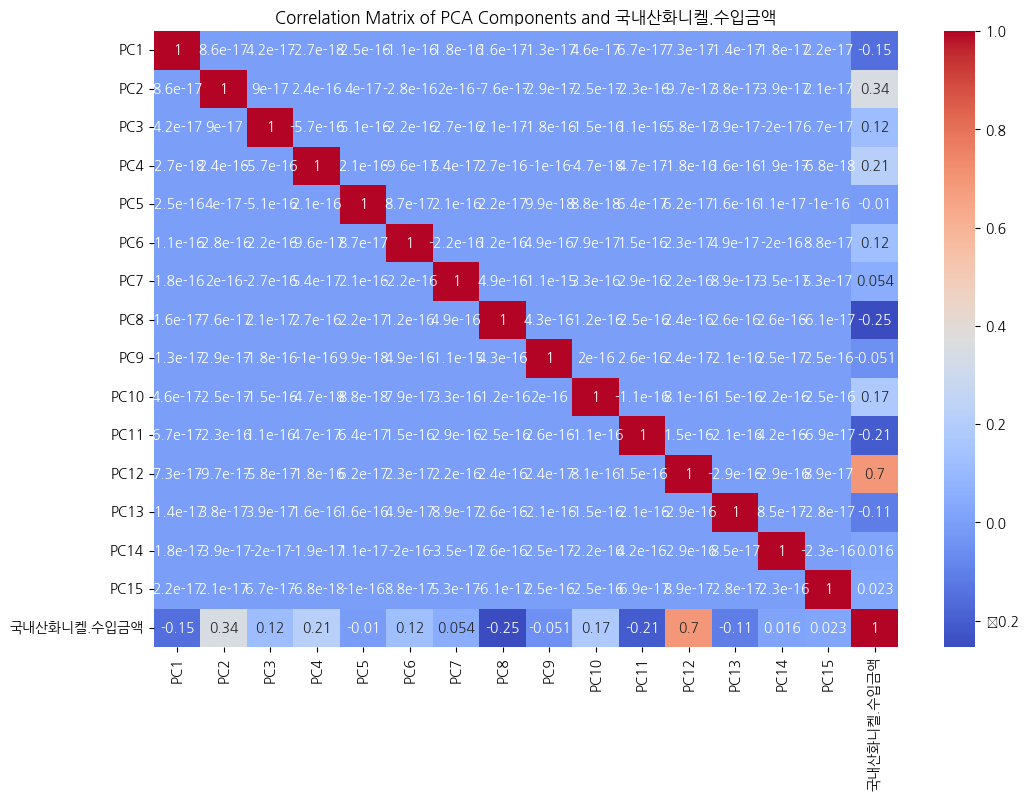

Mean Squared Error: 833592.4052692122
R-squared: 0.8234723183715582


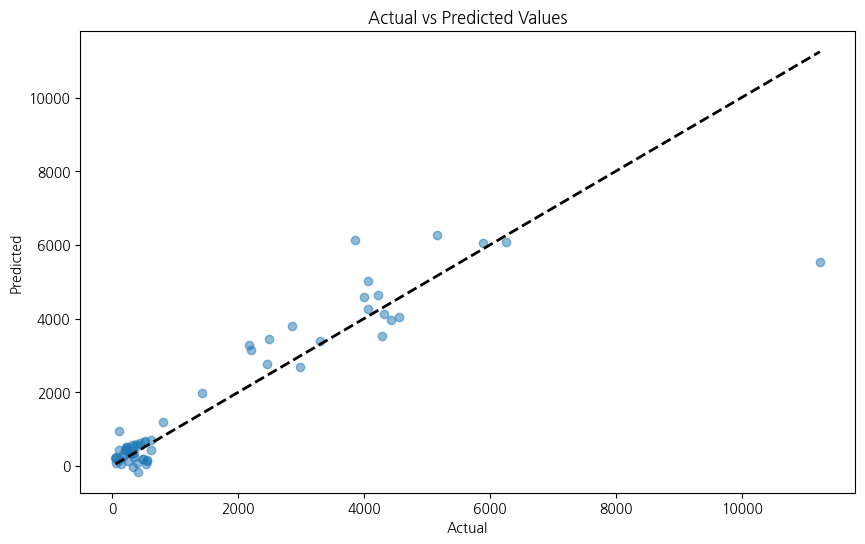

                            OLS Regression Results                            
Dep. Variable:            국내산화니켈.수입금액   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     92.43
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           2.54e-85
Time:                        10:10:17   Log-Likelihood:                -1893.5
No. Observations:                 233   AIC:                             3819.
Df Residuals:                     217   BIC:                             3874.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1566.5557     57.057     27.456      0.0

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib.font_manager 임포트
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

print("폰트 설정 완료")

# 데이터 불러오기
df = pd.read_csv('/content/alldata.csv')

# 날짜 형식을 맞춰줍니다.
df['date'] = pd.to_datetime(df['date'])

# 필요한 열만 선택합니다.
columns = [
    '국내산화니켈.수출금액', '국내산화니켈.수출중량', '국내산화니켈.수입금액', '국내산화니켈.수입중량',
    '국내산화리튬.수출금액', '국내산화리튬.수출중량', '국내산화리튬.수입금액', '국내산화리튬.수입중량',
    '국내산화코발트.수출금액', '국내산화코발트.수출중량', '국내산화코발트.수입금액', '국내산화코발트.수입중량',
    '국내이산화망간.수출금액', '국내이산화망간.수출중량', '국내이산화망간.수입금액', '국내이산화망간.수입중량',
    '국내탄산리튬.수출금액', '국내탄산리튬.수출중량', '국내탄산리튬.수입금액', '국내탄산리튬.수입중량',
    '국내황산니켈.수출금액', '국내황산니켈.수출중량', '국내황산니켈.수입금액', '국내황산니켈.수입중량',
    '국내황산코발트.수출금액', '국내황산코발트.수출중량', '국내황산코발트.수입금액', '국내황산코발트.수입중량'
]

# 데이터 전처리
df_selected = df[columns].dropna()

# PCA 변환
pca = PCA(n_components=15)
pca_components = pca.fit_transform(df_selected.drop(columns=[
    '국내산화니켈.수입금액', '국내산화리튬.수입금액', '국내산화코발트.수입금액', '국내이산화망간.수입금액',
    '국내탄산리튬.수입금액', '국내황산니켈.수입금액', '국내황산코발트.수입금액'
]))

# 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(15)])
pca_df['국내산화니켈.수입금액'] = df_selected['국내산화니켈.수입금액'].values

# 데이터 분할
X = pca_df.drop(columns=['국내산화니켈.수입금액'])
y = pca_df['국내산화니켈.수입금액']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# statsmodels를 사용한 회귀 분석
X_train_sm = sm.add_constant(X_train)  # 상수항 추가
model = sm.OLS(y_train, X_train_sm).fit()

# PCA 변환 데이터에 대한 회귀 분석 플롯
plot_cols = ['국내산화니켈.수입금액'] + [f'PC{i+1}' for i in range(15)]
plot_df = pca_df[plot_cols]

plt.figure(figsize=(10, 10))
for idx, col in enumerate(plot_cols[1:]):
    axl = plt.subplot(4, 4, idx + 1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=axl)
plt.tight_layout()
plt.show()

# 종속 변수 히스토그램
sns.displot(x='국내산화니켈.수입금액', kind='hist', data=pca_df)
plt.show()

# 상관 분석
correlation_matrix = pca_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of PCA Components and 국내산화니켈.수입금액')
plt.show()

# 예측
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 모델 예측값과 실제값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 결과 요약 출력
print(model.summary())

# 다중 상관계수
r_squared = model.rsquared
print(f'다중 상관계수 (R^2): {r_squared:.4f}')

# 표준오차, t통계량, p값, 신뢰구간
coefficients = model.params
std_errors = model.bse
t_values = model.tvalues
p_values = model.pvalues
conf_intervals = model.conf_int()

print("\n계수:")
print(coefficients)
print("\n표준오차:")
print(std_errors)
print("\nT-통계량:")
print(t_values)
print("\nP-값:")
print(p_values)
print("\n95% 신뢰구간:")
print(conf_intervals)






